In [1]:
from tools.KNN import KNN
knn = KNN()
anomaly_score, y = knn.cluster_all()
knn.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.9814322916666667

In [2]:
print(min(anomaly_score), max(anomaly_score))

1.4921307158203376 49.25445708362789


In [3]:
from tools.LOF import LOF
lof = LOF()
anomaly_score, y = lof.cluster_all()
lof.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.988984375

In [4]:
print(min(anomaly_score), max(anomaly_score))

0.8565016433725487 14.960234362978293


In [5]:
from tools.Iforest import Iforest
ifo = Iforest()
anomaly_score, y = ifo.cluster_all()
ifo.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.9653385416666667

In [6]:
print(min(anomaly_score), max(anomaly_score))

-0.16397047012851756 0.3144576599714679


In [7]:
from tools.HierarchicalClustering import HierarchicalClustering
hic = HierarchicalClustering()
anomaly_score, y = hic.cluster_all()
hic.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.9686979166666667

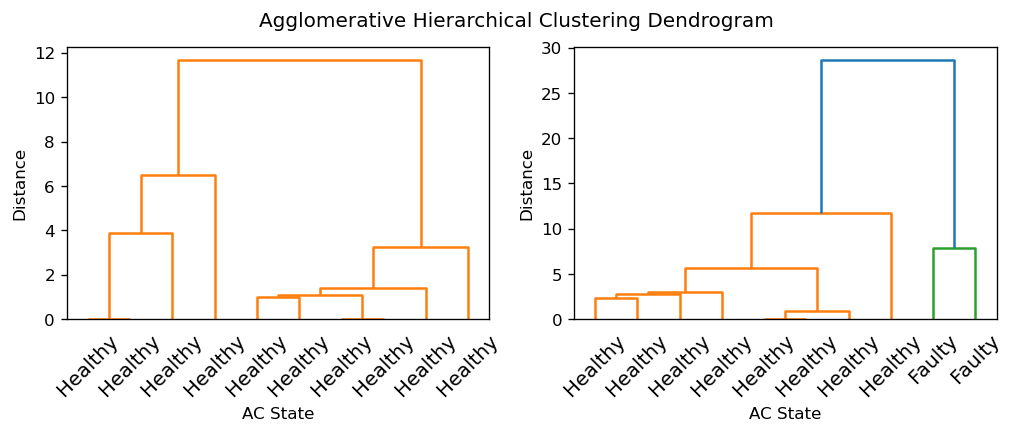

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def plot_dendrogram(row):
    x_row, y_row = hic.get_X_Y(row)
    linked = linkage(x_row, 'average')
    labelList = ['Faulty' if x else 'Healthy' for x in y_row]
    plt1 = dendrogram(linked,
                orientation='top',
                leaf_rotation=45,
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True,
                color_threshold= 18.93)
    return plt1

plt.figure(figsize=(10, 3), dpi=120)
plt.suptitle('Agglomerative Hierarchical Clustering Dendrogram')

plt.subplot(1, 2, 1)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt1 = plot_dendrogram(0)


plt.subplot(1, 2, 2)
plt.xlabel('AC State')
plt.ylabel('Distance')
plt2 = plot_dendrogram(10)

In [9]:
from tools.SVMOneClass import SVMOneClass
svm = SVMOneClass()
anomaly_score, y = svm.cluster_all()
svm.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.9460937500000002

In [10]:
print(min(anomaly_score), max(anomaly_score))

-0.1609333950446512 1.5942015144317767


In [11]:
from tools.Inne import Inne
inne = Inne()
anomaly_score, y = inne.cluster_all()
inne.auc_score(anomaly_score, y)

0% complete
5% complete
10% complete
15% complete
20% complete
25% complete
30% complete
35% complete
40% complete
45% complete
50% complete
55% complete
60% complete
65% complete
70% complete
75% complete
80% complete
85% complete
90% complete
95% complete
100% complete


0.846796875